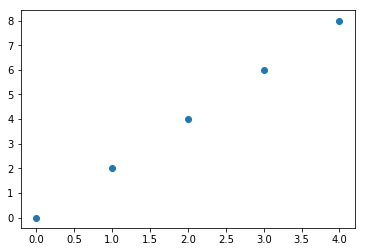

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

t = [0,1,2,3,4]
x = [0,2,4,6,8]

plt.scatter(t,x)
plt.show()

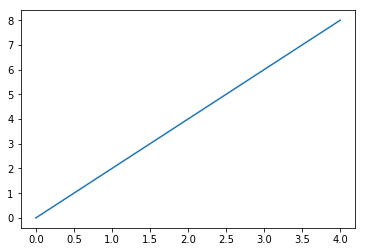

In [9]:
import numpy as np

# z = 2t
def position(time):
    return 2*time

t = np.linspace(0, 4)
x = position(t)
plt.plot(t, x)

plt.show()

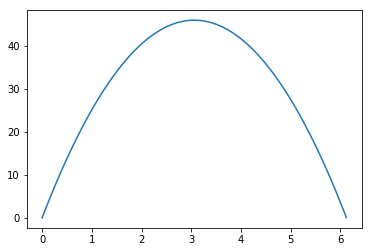

In [10]:
import numpy as np

# z = -4.9t^2 + 30t
def position_b(time):
    return (-4.9*time*time + 30*time)

t = np.linspace(0, 6.12)
x = position_b(t)
plt.plot(t, x)

plt.show()

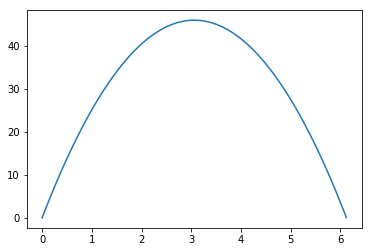

In [13]:
import numpy as np

# z = -4.9t^2 + 30t
def position_b(time):
    return (-4.9*time*time + 30*time)

def plot_continuous_function(function, t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = function(t)
    plt.plot(t,x)
    
plot_continuous_function(position_b, 0, 6.12)
plt.show()

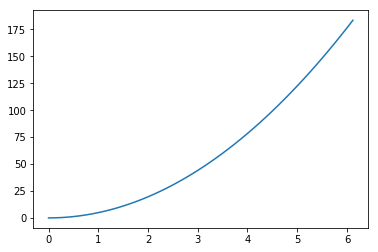

In [16]:
import numpy as np

# z = -4.9t^2 + 30t
def position_b(time):
    return (-4.9*time*time + 30*time)

# z = K
def constant_position_motion(time):
    position = 20
    return position + 0*time

# z = Kt
def constant_velocity_motion(time):
    velocity = 10
    return velocity * time

# z = K / 2t^2
def constant_acceleration_motion(time):
    acceleration = 9.8
    return (acceleration / 2) * time ** 2

def plot_continuous_function(function, t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = function(t)
    plt.plot(t,x)
    
t_min = 0
t_max = 6.12

plot_continuous_function(constant_acceleration_motion, t_min, t_max)
plt.show()

Slope at 3.45 is -3.8100000000003575 approx


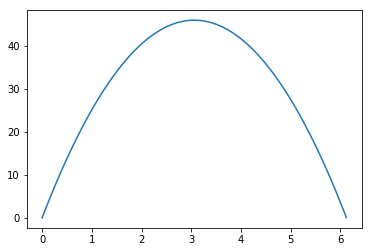

In [25]:
# find slope at a point (approximate)
t = 3.45
delta_t = 0.02
delta_z = position_b(t + delta_t/2) - position_b(t - delta_t/2)
slope = delta_z/delta_t
print("Slope at {} is {} approx".format(t, slope))


import numpy as np

# z = -4.9t^2 + 30t
def position_b(time):
    return (-4.9*time*time + 30*time)


def plot_continuous_function(function, t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = function(t)
    plt.plot(t,x)
    
t_min = 0
t_max = 6.12

plot_continuous_function(position_b, t_min, t_max)
plt.show()

Wrapping the slope calculation in a function _approximate_derivate_

Slope at 3.45 is -3.8100000000003575 approx


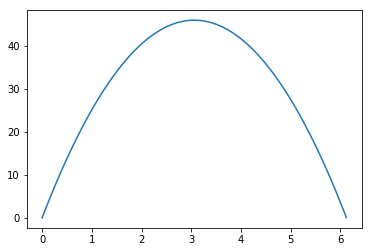

In [26]:
# find slope at a point (approximate)
def approximate_derivative(f,t):
    delta_t = 0.02
    delta_z = f(t + delta_t/2) - position_b(t - delta_t/2)
    slope = delta_z/delta_t
    return slope

print("Slope at {} is {} approx".format(t, approximate_derivative(position_b, 3.45)))

import numpy as np

# z = -4.9t^2 + 30t
def position_b(time):
    return (-4.9*time*time + 30*time)

def plot_continuous_function(function, t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = function(t)
    plt.plot(t,x)
    
t_min = 0
t_max = 6.12

plot_continuous_function(position_b, t_min, t_max)
plt.show()

Now let us try to graph the "slope" function. We just found for one point 3.45. Let us do for all points from 0 to 6.12

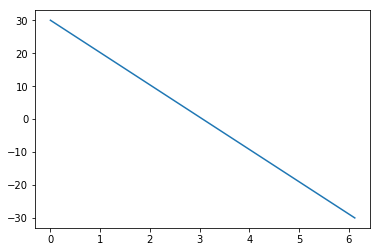

In [29]:
# find slope at a point (approximate)
def approximate_derivative(f,t):
    delta_t = 0.02
    delta_z = f(t + delta_t/2) - f(t - delta_t/2)
    slope = delta_z/delta_t
    return slope
#print("Slope at {} is {} approx".format(t, approximate_derivative(position_b, 3.45)))


import numpy as np

# z = -4.9t^2 + 30t
def position_b(time):
    return (-4.9*time*time + 30*time)

# v = dz/dt = -9.8t + 30
def velocity_b(f):
    def f_dot(t):
        return approximate_derivative(f,t)
    return f_dot

def plot_continuous_function(function, t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = function(t)  # this will become velocity_b(position_b(t)) 
    plt.plot(t,x)
    
t_min = 0
t_max = 6.12

plot_continuous_function(velocity_b(position_b), t_min, t_max)   # this will become velocity_b(position_b(t)) 
plt.show()

In [53]:
def outer(num1):
       
    def inner_increment(num1):  # hidden from outer code
        return num1 + 1
    
    num2 = inner_increment(num1)  #inner_increment(10)
    print(num1, num2)


outer(10)

10 11


In [82]:
#https://realpython.com/inner-functions-what-are-they-good-for/
"""
1. Call the outer function: generate_power(2)
2. Build the nth_power() function which takes a single argument power
3. Take a snapshot of the state of nth_power() which includes power=2
4. Pass that snapshot into the generate_power() function
5. Return the nth_power() function
"""

def generate_power(number):
    """
    Examples of use:

    >>> raise_two = generate_power(2)
    >>> raise_three = generate_power(3)
    >>> print(raise_two(7))
    128
    >>> print(raise_three(5))
    243
    """

    # define the inner function ...
    def nth_power(power):
        return number ** power
    # ... which is returned by the factory function

    return nth_power  

number = 2        # factory function variable
power = 7         # inner function variable
raise_two = generate_power(number)    # raise_three is a new function each time its called
raise_two(power)                      # returns 2 ** 7  (number ** power). THIS REMEBERS THE 'number', that is '2'

128

In [87]:
def position_b(time):
    return (-4.9*time*time + 30*time)

def approximate_derivative(f,t):
    delta_t = 0.02
    delta_z = f(t + delta_t/2) - f(t - delta_t/2)
    slope = delta_z/delta_t
    return slope

def get_derivative(function_f):
    
    def f_dot(time_instant):
        return approximate_derivative(function_f, time_instant)

    return f_dot

function_f = position_b  # factory function variable which is another function
time_instant = 3.45      # inner function variable
velocity_b = get_derivative(function_f)    # velocity_b is a function returned
print(velocity_b(time_instant))            # so we call it with appropriate inner function defined

acceleration_b = get_derivative(velocity_b) # acceleration_b is a function returned
print(acceleration_b(time_instant))         

-3.8100000000003575
-9.80000000000203


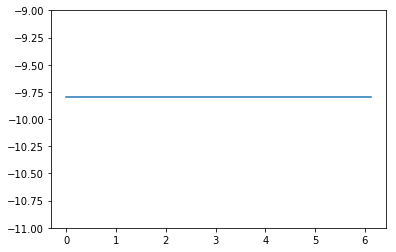

In [91]:
plt.ylim([-11, -9])
plot_continuous_function(get_derivative(velocity_b), t_min, t_max)   # this will become velocity_b(position_b(t)) 
plt.show()